In [1]:
using Images, Colors, Plots, Wavelets, TestImages

In [2]:
function chaosgame_dnasequence(txtfile,res)
    display(txtfile)
    f = open(txtfile)
    lines = readlines(f)[2:end]
    close(f)
    
    #Read sequence into array, the first line of file is description
    sequence = reduce(*,"",map(strip,lines))
    display(length(sequence))
#     sequence2 = ""
#     for s in sequence
#         if s != 'N'
#             sequence2 *= s
#         end
#     end
#     sequence = sequence2
    
    #Define bases on corners across from their pair
    codes = Dict('C'=>[0,1], 'T'=>[1,1], 'G'=>[1,0], 'A'=>[0,0])
    # codes = Dict('C'=>[0,1], 'A'=>[1,1], 'T'=>[1,0], 'G'=>[0,0])

    #Chaos game
    positions = zeros(2,length(sequence))
    positions[:,1] = [0.5,0.5] #start in the middle
    for i = 1:length(sequence)
        if i==1
            prev = [0.5,0.5]
        else
            prev = positions[:,i-1]
        end
        next = (prev+codes[sequence[i]])*0.5
        positions[:,i] = next
    end

    #Print image
    # res = 400
    A = ones(3, res, res)
    img = colorview(RGB, A)
    r,c = size(positions)
    for i = 1:c
        code = sequence[i]
        posn = ceil.(Int,positions[:,i]*res)
        img[posn...] = RGB(0,0,0)
    end
    img
end

chaosgame_dnasequence (generic function with 1 method)

In [3]:
img = chaosgame_dnasequence("cannabis/dagestani.txt",4000)
function boxcounting(img)
    # Scan over fixed regular box grid to determine which boxes contain fractal
    rows,cols = size(img)
    resolutions = [1,2,4,8,10,16,20,25,40,50,100,125,200,250,400]
#     resolutions = [25,40,50,100,125,200,250,500]
    D = []
    for i = 1:length(resolutions)
        boxsize = resolutions[i]
        println(boxsize)
        N = 0#number of boxes containing fractal
        T = 0#total number of boxes
        for x in collect(1:boxsize:rows)
            for y in collect(1:boxsize:cols)
                box = img[x:x+boxsize-1,y:y+boxsize-1]
                cover = sum(box .== RGB(0,0,0))
                if cover > 0
                    N += 1
                end
                T += 1
            end
        end 
        push!(D,(boxsize,N,T))
    end
    display(D)
    D
end
function plotboxcounting(D)
    # Plot log relationship between number of containing boxes
    logr = map(d -> log(d[1]),D)
    logN = map(d -> log(d[2]),D)
    # Least squares method to approximate slope
    logrmean = mean(logr)
    logNmean = mean(logN)
    m = sum((logr-logrmean).*(logN-logNmean))/sum((logr-logrmean).^2)
    println("Approximate fractal dimension is $(-m)")
    b = logNmean - m*logrmean
    p = plot(xlabel="log(r)",ylabel="log(N)")
    plot!(logr,logN)
    plot!(logr,m*logr+b)
end
D = boxcounting(img)
plotboxcounting(D)

"cannabis/dagestani.txt"

153867

1
2
4
8
10
16
20
25
40
50
100
125
200
250


15-element Array{Any,1}:
 (1, 150023, 16000000)
 (2, 143957, 4000000) 
 (4, 128378, 1000000) 
 (8, 95371, 250000)   
 (10, 80588, 160000)  
 (16, 48820, 62500)   
 (20, 35306, 40000)   
 (25, 24277, 25600)   
 (40, 9970, 10000)    
 (50, 6397, 6400)     
 (100, 1600, 1600)    
 (125, 1024, 1024)    
 (200, 400, 400)      
 (250, 256, 256)      
 (400, 100, 100)      

400


Approximate fractal dimension is 1.335406182351179


"cannabis/dagestani.txt"

153867

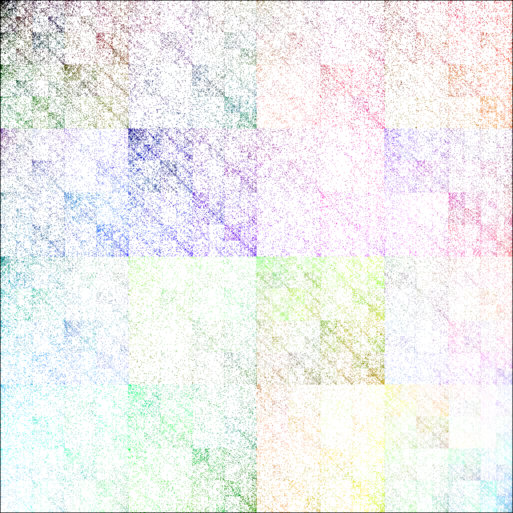

In [4]:
# COLOUR IMAGE WITH 3D HILBERT CURVE MAPPED TO 2D HILBERT CURVE
# Pixels visited in CGR are coloured, others are left white
dagestani = chaosgame_dnasequence("cannabis/dagestani.txt",1024)
hilbert = load("hilbert.jpg")
A = zeros(3, 1024, 1024)
img = colorview(RGB4, A)
for i = 1:4
    idx = i:4:4096
    img[:,:] += hilbert[idx,idx]./4
end
hilbertresize = img

test = hilbertresize
bitarray = dagestani .== RGB(0,0,0) #find where pixels are black in CGR
r,c = size(bitarray)
for y = 1:r
    for x = 1:c
        if !bitarray[y,x]
            test[y,x] = RGB(1,1,1) #change to white to replicate CGR
        end 
    end
end
test

"cannabis/dagestani.txt"

153867

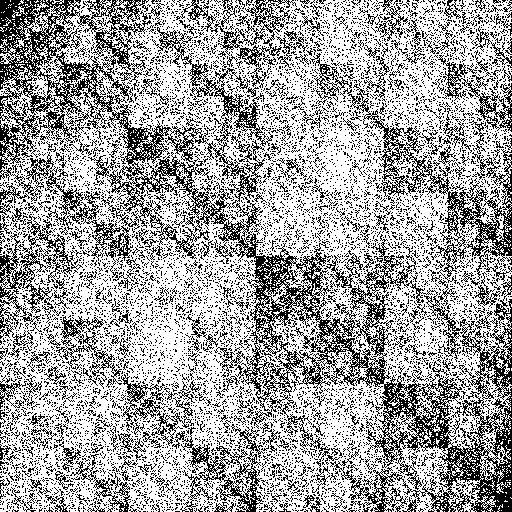

In [5]:
dagestani = chaosgame_dnasequence("cannabis/dagestani.txt",512)


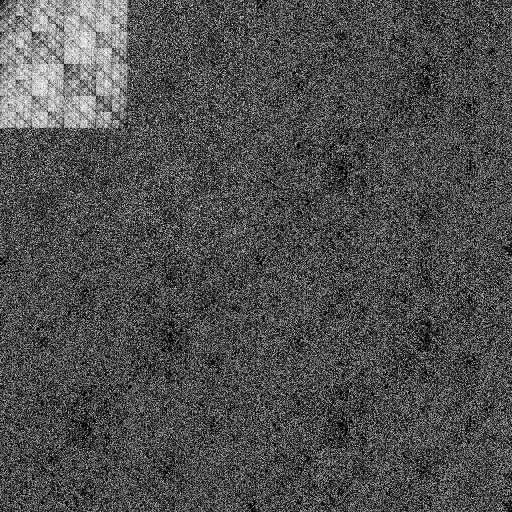

In [6]:
img = Gray.(dagestani)
# img = Gray.(testimage("lena"))
x = Float64.(img)
L = 2 #level of resolution
xts = wplotim(x,L,wavelet(WT.db2))
Gray.(xts)

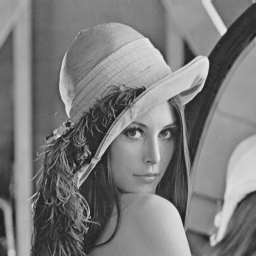

In [7]:
test = Float64.(Gray.(testimage("lena")))
wtest = dwt(test,wavelet(WT.haar))
iwtest = idwt(wtest,wavelet(WT.haar))
colorview(Gray,iwtest)

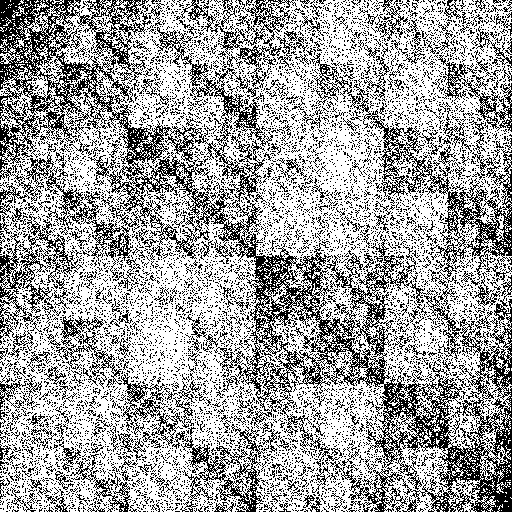

In [8]:
img